## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve

### Getting CSV from  Github

In [ ]:
url = 'https://raw.githubusercontent.com/8maaan/mushroom_classification/main/mushrooms.csv'
data = pd.read_csv(url)

## Exploratory Data Analysis

In [ ]:
# Preview data
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Check shape or matrix type
data.shape

(8124, 23)

In [ ]:
# Check the data types of each column and if there are missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# Count unique values for e = edible and p = poisonous
# Can also be done with other columns, just change the 'class' to the other column name e.g 'cap-shape'
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

## **Preprocessing Section**

### *Convert column values into numerical format/representation*

In [ ]:
labelEncoder = LabelEncoder()

In [ ]:
for column in data.columns:
  data[column] = labelEncoder.fit_transform(data[column])

In [ ]:
# Check data frame again
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1




### Splitting of dataset

In [ ]:
# Separate data y = class column (poisonous/edible) x = rest of the dataframe w/o class column
X = data.drop(columns='class')
y = data['class']

In [ ]:
# Training stage 1.0
# use 25% for test size, 75% for training size
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True, random_state=69)

In [ ]:
# Get an idea of the number of samples and features in the y training set.
y_train.shape

(6093,)

In [ ]:
# Get an idea of the number of samples and features in the x training set.
x_train.shape

(6093, 22)

### Additional preprocessing step

In [ ]:
# Transform the y_train to binary matrix representation
# Since the y_train only consists of 0 and 1, which is the numerical representation for edible and poisonous, then the num_classes should be 2
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)

# **Model Creation (Neural Network)**

In [ ]:
# Sequential model for building neural networks
model = tf.keras.Sequential()

### Defining structures / Adding layers

In [ ]:
# Add first dense layer to help recognize basic shapes or patterns of our model
model.add(tf.keras.layers.Dense(units=32, activation='relu', input_shape=(x_train.shape[-1],)))
# Adding second layer builds on what the first dense layer learned and helps in understanding more complex patterns and details
# input_shape not necessary for second Dense layer since we included it in the first one
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Percentage of neurons to drop or disable randomly to prevent overfitting
model.add(tf.keras.layers.Dropout(0.50))

# Output
# softmax === converts the values into probabilities
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                736       
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 2)                 66        
                                                                 
Total params: 1858 (7.26 KB)
Trainable params: 1858 (7.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Model Training**

In [ ]:
history = model.fit(x_train, y_train, batch_size=500, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
10/10 - 2s - loss: 1.5421 - accuracy: 0.4860 - val_loss: 0.8651 - val_accuracy: 0.5119 - 2s/epoch - 228ms/step
Epoch 2/100
10/10 - 0s - loss: 0.9996 - accuracy: 0.5304 - val_loss: 0.5959 - val_accuracy: 0.6842 - 131ms/epoch - 13ms/step
Epoch 3/100
10/10 - 0s - loss: 0.7656 - accuracy: 0.6293 - val_loss: 0.5205 - val_accuracy: 0.8015 - 132ms/epoch - 13ms/step
Epoch 4/100
10/10 - 0s - loss: 0.6617 - accuracy: 0.6877 - val_loss: 0.4715 - val_accuracy: 0.8220 - 169ms/epoch - 17ms/step
Epoch 5/100
10/10 - 0s - loss: 0.5804 - accuracy: 0.7323 - val_loss: 0.4426 - val_accuracy: 0.8368 - 125ms/epoch - 12ms/step
Epoch 6/100
10/10 - 0s - loss: 0.5284 - accuracy: 0.7702 - val_loss: 0.4132 - val_accuracy: 0.8491 - 154ms/epoch - 15ms/step
Epoch 7/100
10/10 - 0s - loss: 0.4819 - accuracy: 0.7942 - val_loss: 0.3864 - val_accuracy: 0.8638 - 126ms/epoch - 13ms/step
Epoch 8/100
10/10 - 0s - loss: 0.4536 - accuracy: 0.8104 - val_loss: 0.3631 - val_accuracy: 0.8704 - 113ms/epoch - 11ms/step
Ep

# **Predictions and Evaluation**

In [ ]:
y_prob = model.predict(x_test)
print(y_prob[:5])

64/64 [==============================] - 0s 1ms/step
[[9.9931616e-01 6.8384834e-04]
 [9.9999994e-01 1.6134855e-16]
 [2.3390590e-11 9.9999994e-01]
 [9.0848752e-16 9.9999994e-01]
 [7.6582021e-09 9.9999994e-01]]


In [ ]:
# Turn the y_prob into 1 dimensional array for accuracy score
prediction = np.argmax(y_prob, axis=-1)
print(prediction[:5])

[0 0 1 1 1]


In [ ]:
# Accuracy score
ac_score = accuracy_score(y_test, prediction)
print(ac_score)

0.9950763170851797


In [ ]:
# Confusion matrix
con_matrix = confusion_matrix(y_test, prediction)
print(con_matrix)

[[1057    0]
 [  10  964]]


# **Visualization**

Text(50.722222222222214, 0.5, 'actual')

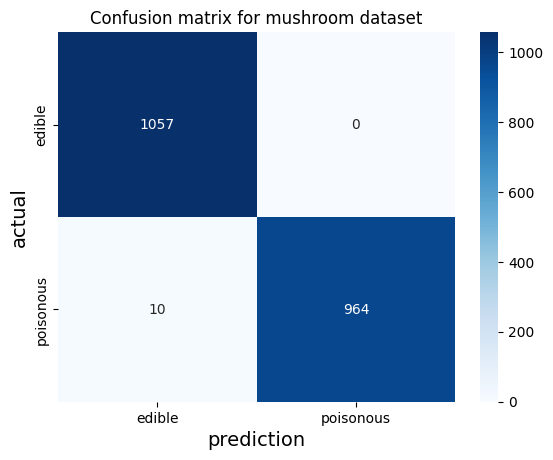

In [ ]:
label=['edible', 'poisonous']
ax = sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
ax.set_title('Confusion matrix for mushroom dataset')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)

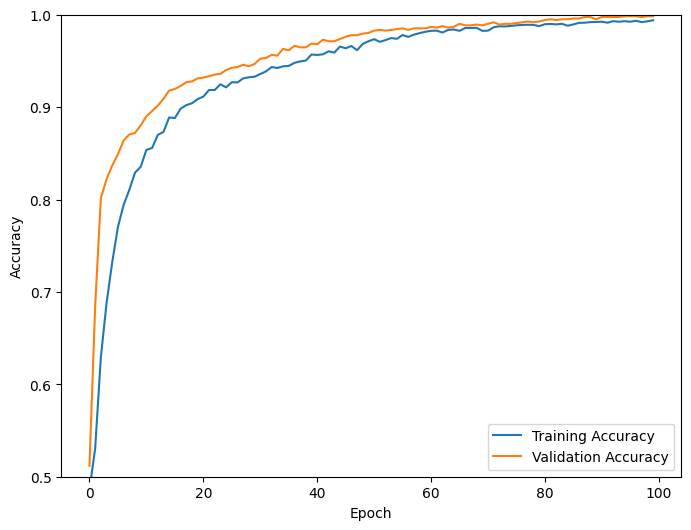

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_prob_positive = y_prob[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)


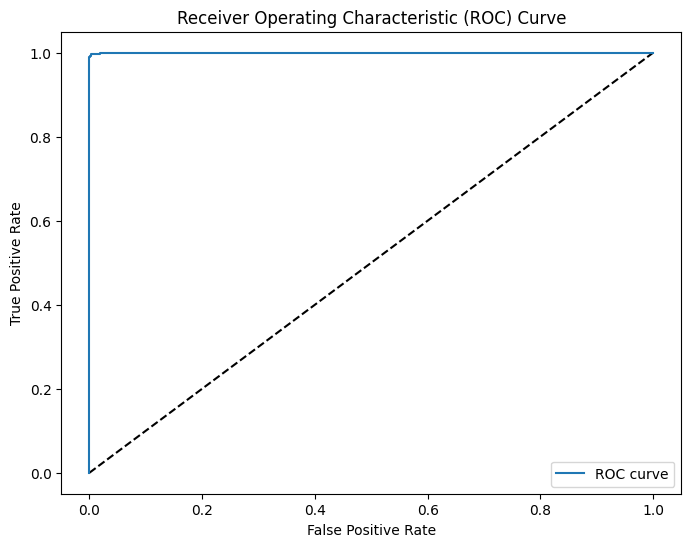

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')  # Add the diagonal line
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()